In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
poll = pd.read_csv('data/poll_dataset.csv')

In [4]:
poll.drop(['Unnamed: 0', 'QKEY'], axis=1, inplace=True)
poll

,Device_Type_W57,LANG_W57,FORM_W57,SATIS_W57,MAINSOPOL_OE_W57,MAINSOPOL_USE_W57,NEWS_MOST_W57,SM1_W57,SOURCEHEARD_1_W57,SOURCEHEARD_2_W57,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,WEIGHT_W57
0,2,1,2,2,7,2,5,3,2,1,...,2,NaN,2,3,3,1.0,3,1,1,0.216268
1,2,1,1,1,16,1,2,4,1,1,...,1,NaN,1,6,2,1.0,1,1,2,0.336417
2,3,1,2,1,2,2,3,4,1,1,...,1,NaN,1,4,2,1.0,3,1,1,0.324384
3,3,1,1,2,3,1,6,3,1,1,...,2,NaN,2,9,1,1.0,3,1,1,0.336275
4,1,1,2,2,6,2,7,4,1,1,...,2,NaN,2,8,1,1.0,4,1,1,0.235732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,3,2,2,1,904,1,3,2,2,2,...,3,2.0,2,4,2,1.0,3,1,2,0.268506
12039,3,2,2,2,57,2,6,1,1,2,...,3,1.0,1,3,3,NaN,2,1,1,0.117014
12040,1,1,2,2,5,2,7,2,1,1,...,4,2.0,2,6,2,3.0,3,1,1,0.083793
12041,3,1,2,1,6,2,3,3,1,1,...,99,99.0,9,6,2,NaN,99,1,2,1.107774


In [198]:
source_use = poll.copy()
for i, name in enumerate(source_use.columns):
    if not name.count('SOURCEUSE') or name.count('OE'):
        source_use.drop(name, axis=1, inplace=True)

#1 is used, 2 is not used, 0 is not shown
source_use[source_use == 999] = 0

In [209]:
real_names = 'ABC News; CBS News; NBC News; NPR; Rush Limbaugh Show (radio); Sean Hannity Show (radio); Washington Post; The New York Times; HuffPost; Breitbart; BBC; Time; Univision; Vice; Daily Caller; Fox News; MSNBC; CNN; PBS; The Wall Street Journal; USA Today; Politico; BuzzFeed; Newsweek; Business Insider; Vox; The Hill; Washington Examiner; New York Post; The Guardian'
source_use.columns = real_names.split('; ') + ['Other']
source_use

,ABC News,CBS News,NBC News,NPR,Rush Limbaugh Show (radio),Sean Hannity Show (radio),Washington Post,The New York Times,HuffPost,Breitbart,...,Politico,BuzzFeed,Newsweek,Business Insider,Vox,The Hill,Washington Examiner,New York Post,The Guardian,Other
0,0,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1,2,2,2,2,1,1,2,2,2,2,...,2,2,2,0,0,2,2,2,0,2.0
2,1,1,1,0,2,0,0,2,0,0,...,0,0,2,0,0,0,0,2,0,2.0
3,2,2,1,2,2,0,2,2,2,0,...,0,2,2,0,0,0,0,2,0,1.0
4,2,2,1,2,0,2,1,1,2,2,...,2,2,2,2,0,2,2,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
12039,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.0
12040,2,2,2,1,0,0,1,1,2,0,...,2,2,2,0,0,0,2,2,2,2.0
12041,2,2,1,0,0,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,2.0


In [250]:
for name in source_use.columns:
    print(f'{name}\t{round(100*poll["WEIGHT_W57"][source_use[name] == 1].sum()/len(source_use))}')

ABC News	33
CBS News	30
NBC News	34
NPR	20
Rush Limbaugh Show (radio)	8
Sean Hannity Show (radio)	9
Washington Post	17
The New York Times	20
HuffPost	8
Breitbart	4
BBC	16
Time	7
Univision	5
Vice	4
Daily Caller	2
Fox News	39
MSNBC	24
CNN	39
PBS	16
The Wall Street Journal	13
USA Today	11
Politico	9
BuzzFeed	7
Newsweek	5
Business Insider	4
Vox	4
The Hill	6
Washington Examiner	2
New York Post	5
The Guardian	6
Other	13


#

# Clean Data

In [331]:
partyln = poll['F_PARTYLN_FINAL'].copy()
partyln[partyln == 1.0] = 'Independent'#'Lean Republican'
partyln[partyln == 2.0] = 'Independent'#'Lean Democrat'
partyln[partyln == 99.0] = np.NaN
partyln[partyln.isna()] = poll['F_PARTY_FINAL'][partyln.isna()]
partyln[partyln == 1.0] = 'Republican'
partyln[partyln == 2.0] = 'Democrat'
partyln[partyln == 3.0] = 'Independent'
partyln

0           Democrat
1         Republican
2         Republican
3           Democrat
4           Democrat
            ...     
12038    Independent
12039    Independent
12040    Independent
12041           99.0
12042       Democrat
Name: F_PARTYLN_FINAL, Length: 12043, dtype: object

In [26]:
we = poll['WEIGHT_W57'].to_numpy()
we.sort()
print(we)

[3.17493281e-03 3.17493281e-03 3.17493281e-03 ... 7.90914379e+00
 7.92012505e+00 7.95761261e+00]


In [13]:
weights = poll['WEIGHT_W57'].to_numpy()
weights = weights / weights.min()
weights = np.round(weights)
weights.sum()

3793140.0

In [840]:
categories = np.zeros((len(poll)), dtype=int)
count = 1
for age in [1, 2, 3, 4]:
    for sex in [1, 2]:
        categories[(poll['F_SEX'] == sex) & (poll['F_AGECAT'] == age)] = count
        count += 1
cat_size = categories.max()
categories, cat_size

(array([8, 7, 7, ..., 3, 5, 2]), 8)

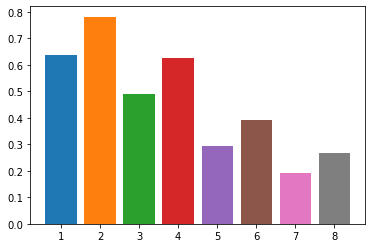

,1,2,3,4,5,6,7,8
True,0.63788,0.781369,0.490993,0.625494,0.294147,0.391885,0.189881,0.267722


In [859]:
social = poll['SM1_W57'].copy()
social[social == 1.0] = True#'Often'
social[social == 2.0] = True#'Sometimes'
social[social == 3.0] = False#'Hardly Ever'
social[social == 4.0] = False#'Never'
social[(social == 999) | (social == 99)] = False#'Never'

sm_distributions = pd.DataFrame(index=[True])
for i in range(1, cat_size+1):
    cat = social.iloc[np.where(categories == i)[0]]

    w = poll['WEIGHT_W57'][np.where(categories == i)[0]].to_numpy()
    sm_distributions[i] = w[list(cat.to_numpy())].sum() / w.sum()
    plt.bar(i, w[list(cat.to_numpy())].sum() / w.sum())
plt.show()

sm_distributions

In [683]:
sources = source_use.drop('Other', axis=1)
media_distributions = pd.DataFrame(index=sources.columns)
for i in range(1, cat_size+1):
    cat = sources.iloc[np.where(categories == i)[0]]
    #plt.bar(i, len(cat))
    dist = np.zeros((len(cat.columns)))
    w = poll['WEIGHT_W57'][np.where(categories == i)[0]].to_numpy()
    for j in range(len(cat.columns)):
        dist[j] = (cat[cat.columns[j]][cat.iloc[:, j] == 1] * w[cat.iloc[:, j] == 1]).sum() / w.sum()#len(cat)
    media_distributions[i] = dist
plt.show()
media_distributions

,1,2,3,4,5,6,7,8
ABC News,0.173997,0.194251,0.262732,0.316070,0.382932,0.433339,0.425736,0.463099
CBS News,0.158805,0.162545,0.224818,0.238161,0.369519,0.392720,0.406588,0.425337
NBC News,0.232755,0.201885,0.298152,0.291231,0.382968,0.393721,0.434247,0.468157
NPR,0.188131,0.163518,0.296292,0.162348,0.210841,0.161547,0.243511,0.195871
Rush Limbaugh Show (radio),0.006840,0.009189,0.064674,0.018665,0.132580,0.062157,0.211653,0.136556
Sean Hannity Show (radio),0.012166,0.010447,0.073468,0.022425,0.184257,0.069965,0.223455,0.151717
Washington Post,0.193010,0.173996,0.234397,0.121510,0.171322,0.129741,0.187285,0.155681
The New York Times,0.272966,0.213564,0.254492,0.156607,0.184915,0.147537,0.219023,0.189826
HuffPost,0.073261,0.063188,0.088668,0.071912,0.086170,0.072372,0.085386,0.067636
Breitbart,0.023656,0.004147,0.044199,0.017612,0.071375,0.030806,0.073964,0.047473


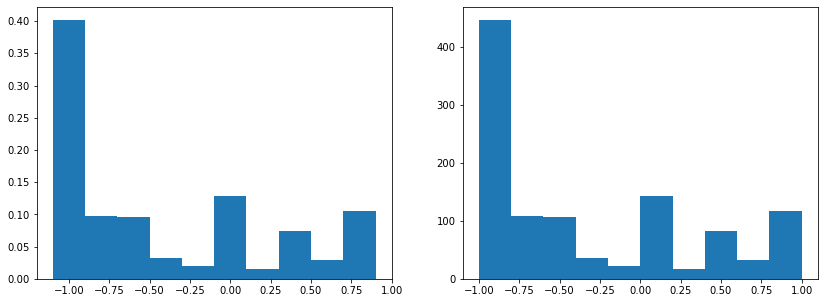

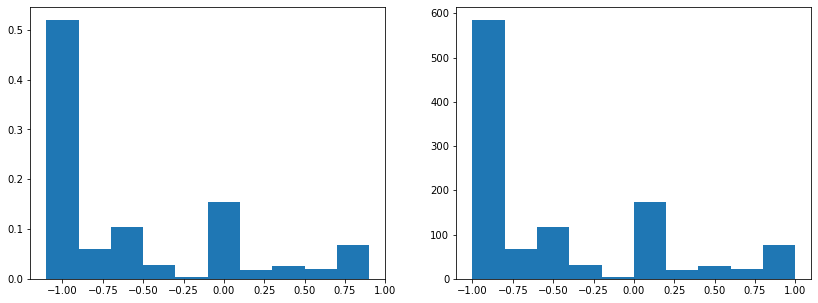

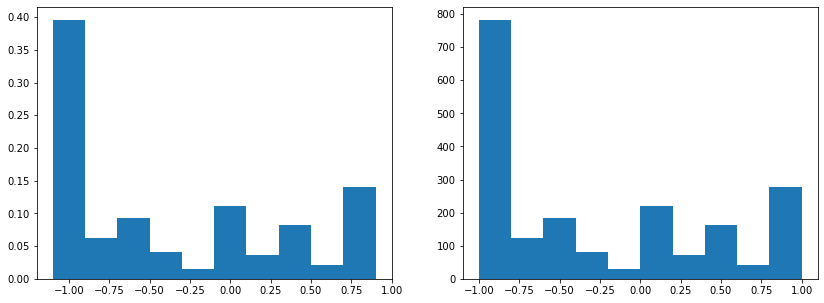

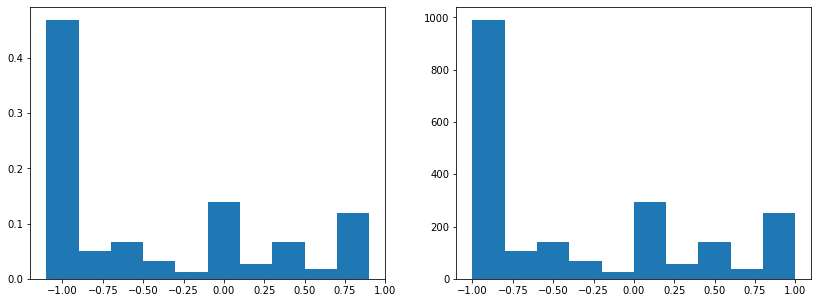

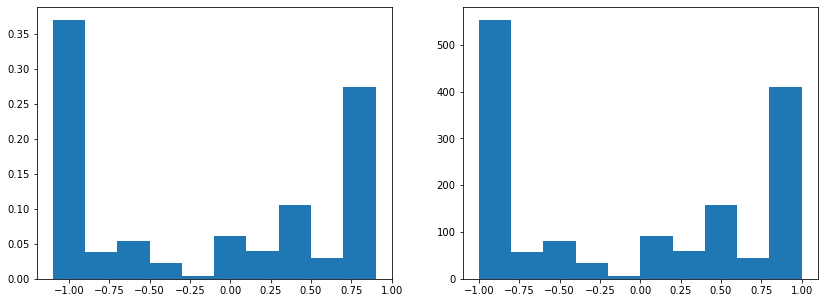

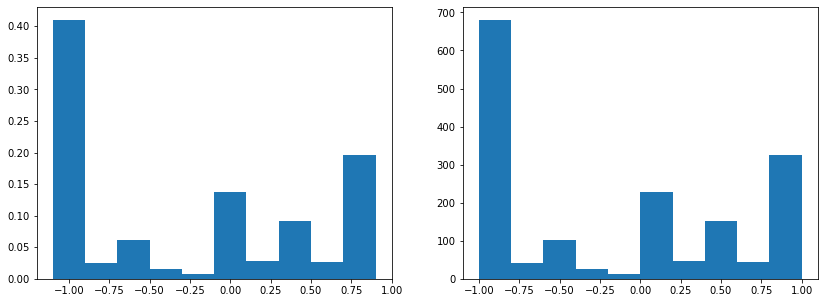

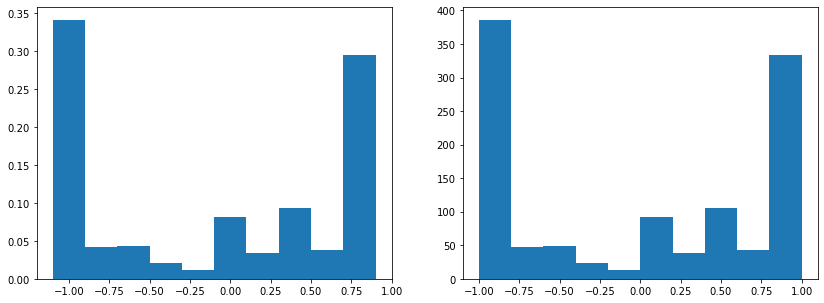

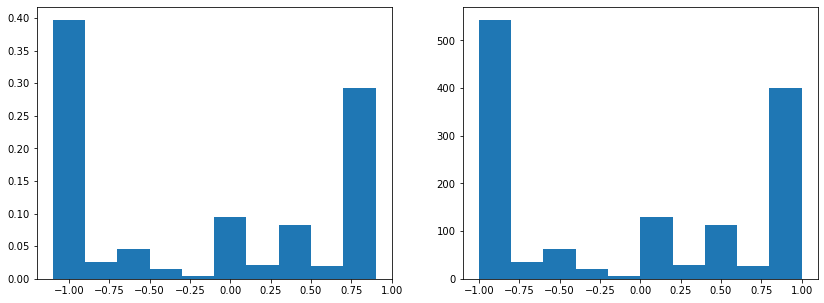

,1,2,3,4,5,6,7,8
1,0.401757,0.520050,0.395701,0.469156,0.369772,0.410029,0.341120,0.396903
2,0.097020,0.059018,0.062695,0.050887,0.038605,0.025330,0.041557,0.026471
3,0.095556,0.103935,0.092952,0.067238,0.054673,0.060780,0.043362,0.045440
4,0.032552,0.028546,0.041145,0.031596,0.021995,0.016190,0.020942,0.014840
5,0.019628,0.003606,0.015537,0.012144,0.004307,0.007388,0.011034,0.004635
6,0.129071,0.154383,0.111038,0.138745,0.061430,0.137721,0.081455,0.095351
7,0.014862,0.017633,0.037025,0.026986,0.039740,0.027500,0.033753,0.021548
8,0.074274,0.026585,0.082577,0.066651,0.105013,0.091174,0.093301,0.082613
9,0.029528,0.019303,0.020389,0.018244,0.030175,0.027107,0.038444,0.019899
10,0.105753,0.066941,0.140942,0.118353,0.274289,0.196781,0.295031,0.292300


In [809]:
bins = 10
approval_distributions = pd.DataFrame(index=[i for i in (range(1, bins+1))])
#loop through categories
for i in range(1, cat_size+1):
    
    cat = (poll['THERMO_THERMTRUMP_W57'][np.where(categories == i)[0]] )
    cat[cat == 999] = 0
    cat = (cat-50)/50
    temp = cat
    
    w = poll['WEIGHT_W57'][np.where(categories == i)[0]].to_numpy()
    
    a, b = -1, 1
    step = (b - a) / bins
    
    dist = [0]*bins
    
    for bin_ in range(bins):
        if bin_ == bins-1:
            mask = (a+(bin_*step) <= temp) & (temp <= a + ((bin_+1)*step))
        else:
            mask = (a+(bin_*step) <= temp) & (temp < a + ((bin_+1)*step))
        
        dist[bin_] = (w[mask]).sum() / w.sum()
    
    approval_distributions[i] = dist
    
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    plt.bar([a + (i*step) for i in range(bins)], approval_distributions[i].values, width=step)
    plt.subplot(122)
    
    plt.hist(temp, weights=w)
    
    
    plt.show()
approval_distributions

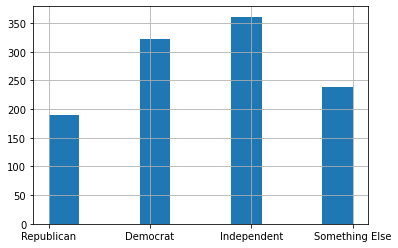

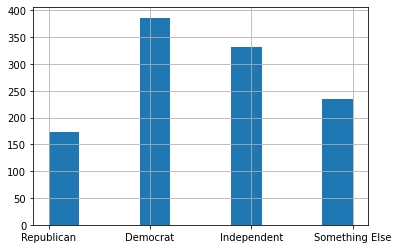

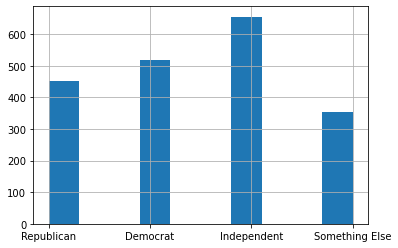

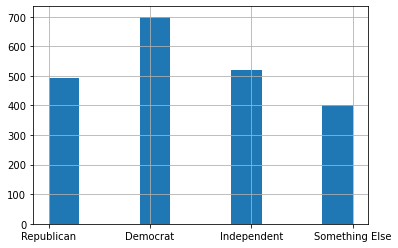

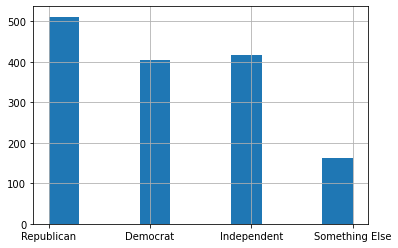

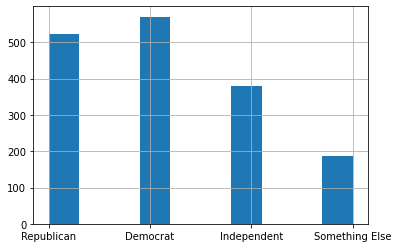

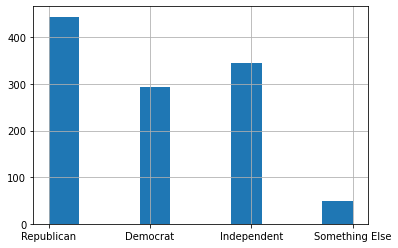

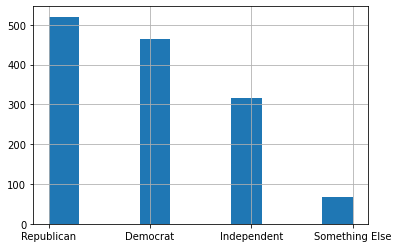

,1,2,3,4,5,6,7,8
Republican,0.170905,0.153124,0.228388,0.233271,0.341925,0.315040,0.392684,0.380518
Democrat,0.289720,0.343513,0.261537,0.331600,0.270452,0.343941,0.258815,0.339487
Independent,0.324762,0.294755,0.331276,0.245512,0.279272,0.228734,0.305589,0.230303
Something Else,0.214613,0.208607,0.178798,0.189617,0.108351,0.112285,0.042912,0.049692


In [685]:
party_distributions = pd.DataFrame(index=['Republican', 'Democrat', 'Independent', 'Something Else'])
for i in range(1, cat_size+1):
    party = poll['F_PARTY_FINAL'][np.where(categories == i)[0]]
    party[party == 99] = 4
    dist = np.zeros((4))
    w = poll['WEIGHT_W57'][np.where(categories == i)[0]].to_numpy()
    party.hist(weights=w)
    plt.xticks([1, 2, 3, 4], labels=['Republican', 'Democrat', 'Independent', 'Something Else'])
    for j in range(1, 5):
        dist[j-1] = w[party == int(j)].sum() / w.sum()#len(party)#len(party[party == int(j)]) / len(party)
    party_distributions[i] = dist
    plt.show()
party_distributions

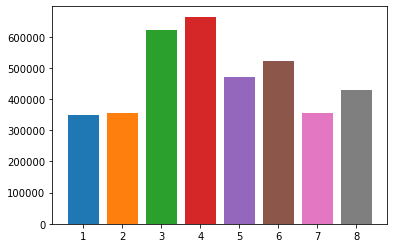

,1,2,3,4,5,6,7,8
Weight,350339.0,354275.0,622593.0,664736.0,471111.0,522511.0,356196.0,430718.0


In [863]:
weights_by_cat = pd.DataFrame(index=['Weight'])
for i in range(1, cat_size+1):
    w = weights[np.where(categories == i)[0]]
    weights_by_cat[i] = w.sum()
    plt.bar(i, w.sum())
plt.show()
weights_by_cat

In [686]:
clean_data = source_use.copy()
clean_data.drop('Other', inplace=True, axis=1)
#clean_data['Opinion of Trump'] = (poll['THERMO_THERMTRUMP_W57'] - 50)/50
#clean_data['Opinion of Trump'][clean_data['Opinion of Trump'] > 1] = 0

#clean_data['Party'] = partyln

#clean_data['Social Media Usage'] = social

clean_data['Weights'] = weights

clean_data['Age/Sex Category'] = categories

clean_data = clean_data[(clean_data['Party'] != 99.0) & (clean_data['Age/Sex Category'] != 0)]
clean_data.index = [i for i in range(len(clean_data))]
clean_data

<ipython-input-686-9220a4b5b01c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Opinion of Trump'][clean_data['Opinion of Trump'] > 1] = 0


,ABC News,CBS News,NBC News,NPR,Rush Limbaugh Show (radio),Sean Hannity Show (radio),Washington Post,The New York Times,HuffPost,Breitbart,...,Vox,The Hill,Washington Examiner,New York Post,The Guardian,Opinion of Trump,Party,Social Media Usage,Weights,Age/Sex Category
0,0,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,-0.8,Democrat,Hardly Ever,68.0,8.0
1,2,2,2,2,1,1,2,2,2,2,...,0,2,2,2,0,1.0,Republican,Never,106.0,7.0
2,1,1,1,0,2,0,0,2,0,0,...,0,0,0,2,0,1.0,Republican,Never,102.0,7.0
3,2,2,1,2,2,0,2,2,2,0,...,0,0,0,2,0,0.1,Democrat,Hardly Ever,106.0,4.0
4,2,2,1,2,0,2,1,1,2,2,...,0,2,2,2,2,-1.0,Democrat,Never,74.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,Republican,Often,66.0,6.0
11876,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,Independent,Sometimes,85.0,5.0
11877,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0.0,Independent,Often,37.0,2.0
11878,2,2,2,1,0,0,1,1,2,0,...,0,0,2,2,2,-0.5,Independent,Sometimes,26.0,3.0


In [687]:
clean_data.to_csv("data/clean_pew_data.csv")

In [688]:
media_distributions.to_csv("data/media_distributions.csv")

In [810]:
approval_distributions.to_csv("data/approval_distributions.csv")

In [690]:
party_distributions.to_csv("data/party_distributions.csv")

In [860]:
sm_distributions.to_csv("data/sm_distributions.csv")

In [864]:
weights_by_cat.to_csv("data/weights_by_cat.csv")

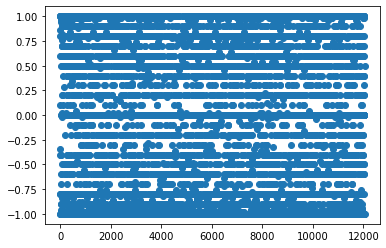

In [246]:
w = poll['THERMO_THERMTRUMP_W57'] < 999
plt.plot((poll['THERMO_THERMTRUMP_W57'][w] - 50)/50, 'o')

In [258]:
np.where(w == False)[0]

array([  264,   515,   632,   848,   910,   983,  1896,  2009,  2167,
        2185,  2802,  2892,  3121,  3437,  3504,  3604,  3643,  3681,
        3707,  3747,  3865,  3874,  3888,  4136,  4240,  4393,  4744,
        4966,  5009,  5865,  6207,  6516,  7068,  7170,  7281,  7327,
        7409,  7949,  8000,  8026,  8407,  8808,  9384,  9658,  9752,
        9940,  9993, 10162, 10254, 10727, 10857, 10905, 11069, 11149,
       11182, 11240, 11415, 11531, 11711, 11723, 11731, 11736, 11812,
       11888, 11897, 11903], dtype=int64)

In [815]:
clean_data.to_numpy()[0]

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, -0.8, 'Democrat', 'Hardly Ever', 68.0, 8.0],
      dtype=object)

In [334]:
for i in poll.columns:
    print(i)

Device_Type_W57
LANG_W57
FORM_W57
SATIS_W57
MAINSOPOL_OE_W57
MAINSOPOL_USE_W57
NEWS_MOST_W57
SM1_W57
SOURCEHEARD_1_W57
SOURCEHEARD_2_W57
SOURCEHEARD_3_W57
SOURCEHEARD_4_W57
SOURCEHEARD_5_W57
SOURCEHEARD_6_W57
SOURCEHEARD_7_W57
SOURCEHEARD_8_W57
SOURCEHEARD_9_W57
SOURCEHEARD_10_W57
SOURCEHEARD_11_W57
SOURCEHEARD_12_W57
SOURCEHEARD_13_W57
SOURCEHEARD_14_W57
SOURCEHEARD_15_W57
SOURCEHEARD_16_W57
SOURCEHEARD_17_W57
SOURCEHEARD_18_W57
SOURCEHEARD_19_W57
SOURCEHEARD_20_W57
SOURCEHEARD_21_W57
SOURCEHEARD_22_W57
SOURCEHEARD_23_W57
SOURCEHEARD_24_W57
SOURCEHEARD_25_W57
SOURCEHEARD_26_W57
SOURCEHEARD_27_W57
SOURCEHEARD_28_W57
SOURCEHEARD_29_W57
SOURCEHEARD_30_W57
SOURCEHEARD_99_W57
SOURCETRUST_1_W57
SOURCETRUST_2_W57
SOURCETRUST_3_W57
SOURCETRUST_4_W57
SOURCETRUST_5_W57
SOURCETRUST_6_W57
SOURCETRUST_7_W57
SOURCETRUST_8_W57
SOURCETRUST_9_W57
SOURCETRUST_10_W57
SOURCETRUST_11_W57
SOURCETRUST_12_W57
SOURCETRUST_13_W57
SOURCETRUST_14_W57
SOURCETRUST_15_W57
SOURCETRUST_16_W57
SOURCETRUST_17_W57
SOURC

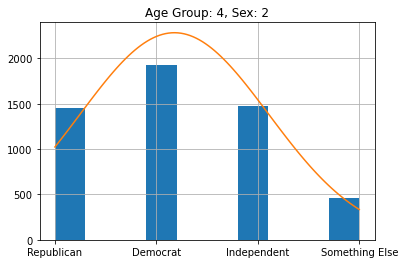

In [621]:
party = poll['F_PARTY_FINAL'][(poll['F_SEX'] == sex) == (poll['F_AGECAT'] == age)][poll['F_PARTY_FINAL'] != 99]
party.hist()
plt.xticks([1, 2, 3, 4], labels=['Republican', 'Democrat', 'Independent', 'Something Else'])
plt.title(f'Age Group: {age}, Sex: {sex}')
mu = party.mean()
sigma = party.std()
x = np.linspace(1, 4, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma)*len(party))
plt.show()

Use Chance: 5.607476635514018


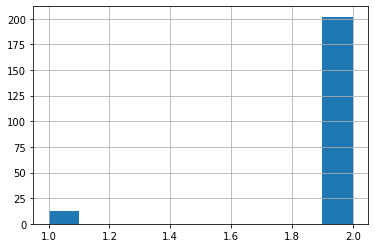

Use Chance: 3.3333333333333335


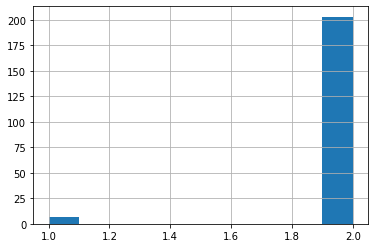

Use Chance: 8.49933598937583


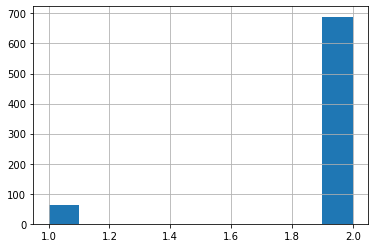

Use Chance: 3.907380607814761


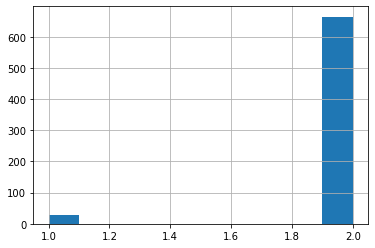

Use Chance: 9.827357237715804


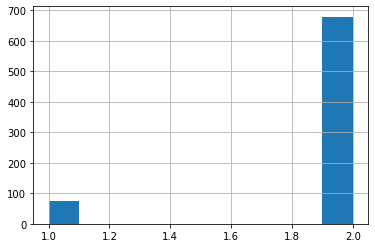

Use Chance: 5.291723202170964


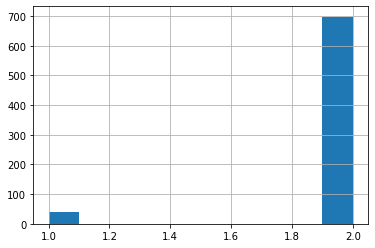

Use Chance: 10.267229254571026


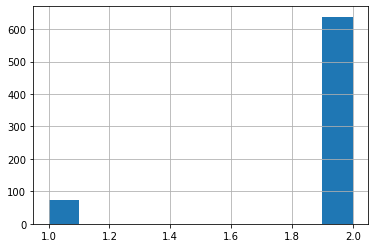

Use Chance: 5.64373897707231


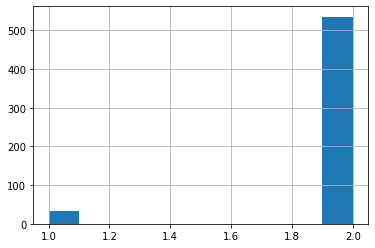

In [452]:
for age in [1, 2, 3, 4]:
    for sex in [1, 2]:
        party = poll['SOURCEUSE_28_W57'][(poll['F_SEX'] == sex) & (poll['F_AGECAT'] == age)][poll['SOURCEUSE_28_W57'] != 999]
        party.hist()
        print(f'Use Chance: {100*len(party[party == 1])/len(party)}')
        plt.show()

<AxesSubplot:>

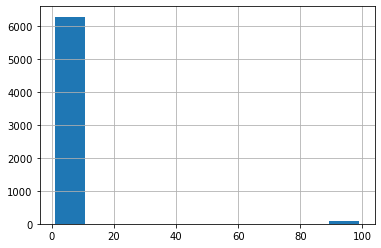

In [396]:
poll['F_PARTY_FINAL'][(poll['F_SEX'] == sex) == (poll['F_AGECAT'] == age)].hist()

In [439]:
np.random.normal(mu, sigma)

1.9700883552586947

In [114]:
steps = 30
vals = np.random.rand(28)
test = np.random.rand(300, 28)-0.3
test = np.round((np.abs(test)))
test = np.concatenate((test, np.zeros((len(test), steps-len(test[0])))), axis=1)

In [122]:
def using_np(x):
    try:
        index = np.random.choice(x.nonzero()[0], len(x))
        steps = np.zeros(len(x))
        steps[index] = vals[index]
    except:
        return np.full(len(x), np.nan)
    return x


def using_loop(x):
    i = 0
    for row in x:
        try:
            index = np.random.choice(row.nonzero()[0], len(row))
            x[i] = vals[index]
        except:
            x[i] = np.full(len(row), np.nan)
        
        i+=1
    return x

In [110]:
%timeit np.apply_along_axis(using_np, 1, test.copy())
%timeit using_loop(test.copy())

6.25 s ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.81 s ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [123]:
using_loop(test.copy())

array([[0.27824305, 0.27824305, 0.72208063, ..., 0.06958945, 0.27824305,
        0.27824305],
       [0.2875434 , 0.27824305, 0.63887527, ..., 0.31900526, 0.27824305,
        0.27824305],
       [0.69942856, 0.56164642, 0.69942856, ..., 0.69942856, 0.44954264,
        0.59032229],
       ...,
       [0.51817118, 0.59032229, 0.59032229, ..., 0.76578038, 0.59032229,
        0.59032229],
       [0.06958945, 0.30134323, 0.70992522, ..., 0.30134323, 0.06958945,
        0.70992522],
       [0.31900526, 0.06958945, 0.56164642, ..., 0.06958945, 0.08249477,
        0.31900526]])